In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
print(df.head(30))

    patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0      103368   53       1          2        171                0   
1      119250   40       1          0         94              229   
2      119372   49       1          2        133              142   
3      132514   43       1          0        138              295   
4      146211   31       1          1        199                0   
5      148462   24       1          1        173                0   
6      168686   79       1          2        130              240   
7      170498   52       1          0        127              345   
8      188225   62       1          0        121              357   
9      192523   61       0          0        190              181   
10     201030   59       0          1        190              529   
11     208877   58       1          2        192              409   
12     223295   27       1          0        129              135   
13     226481   59       1        

In [10]:
print(df.describe())
print(df.info())

          patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000       

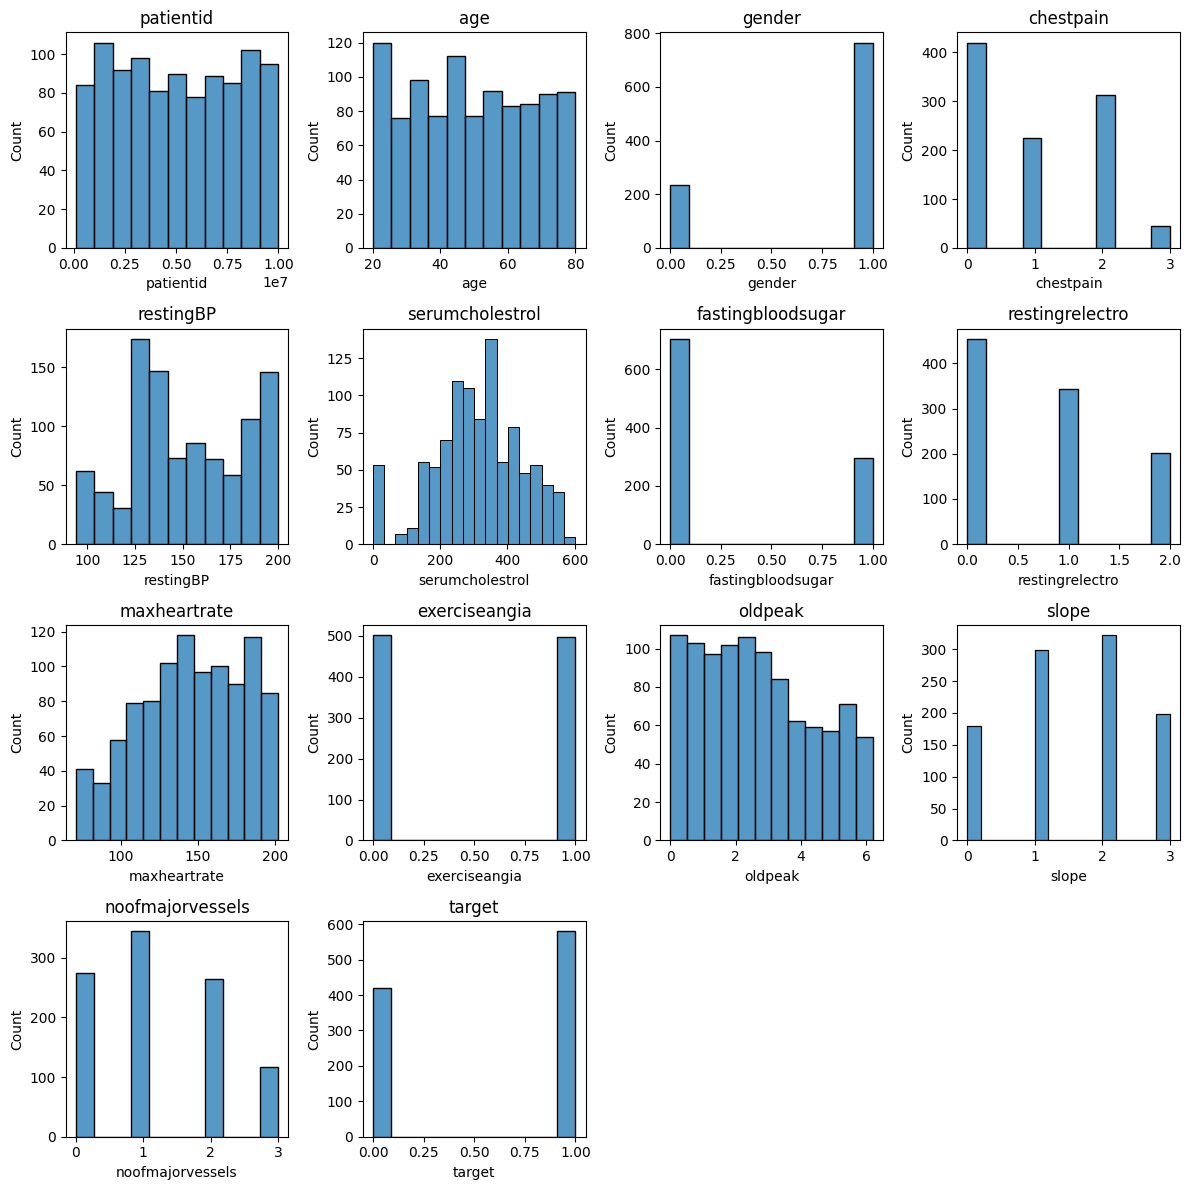

In [26]:
# visualize the distribution of the data
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12,12))

# flattens the axes array to easily iterate over it
axes = axes.flatten()

num_features = len(df.columns) 

for i, ax in enumerate(axes):
    if i < num_features:  # check if there are still columns to plot
        sns.histplot(x=df.columns[i], data=df, ax=ax)
        ax.set_title(df.columns[i])
    else:
        ax.axis('off')  # turn off unused subplots
plt.tight_layout()
plt.show()

In [13]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

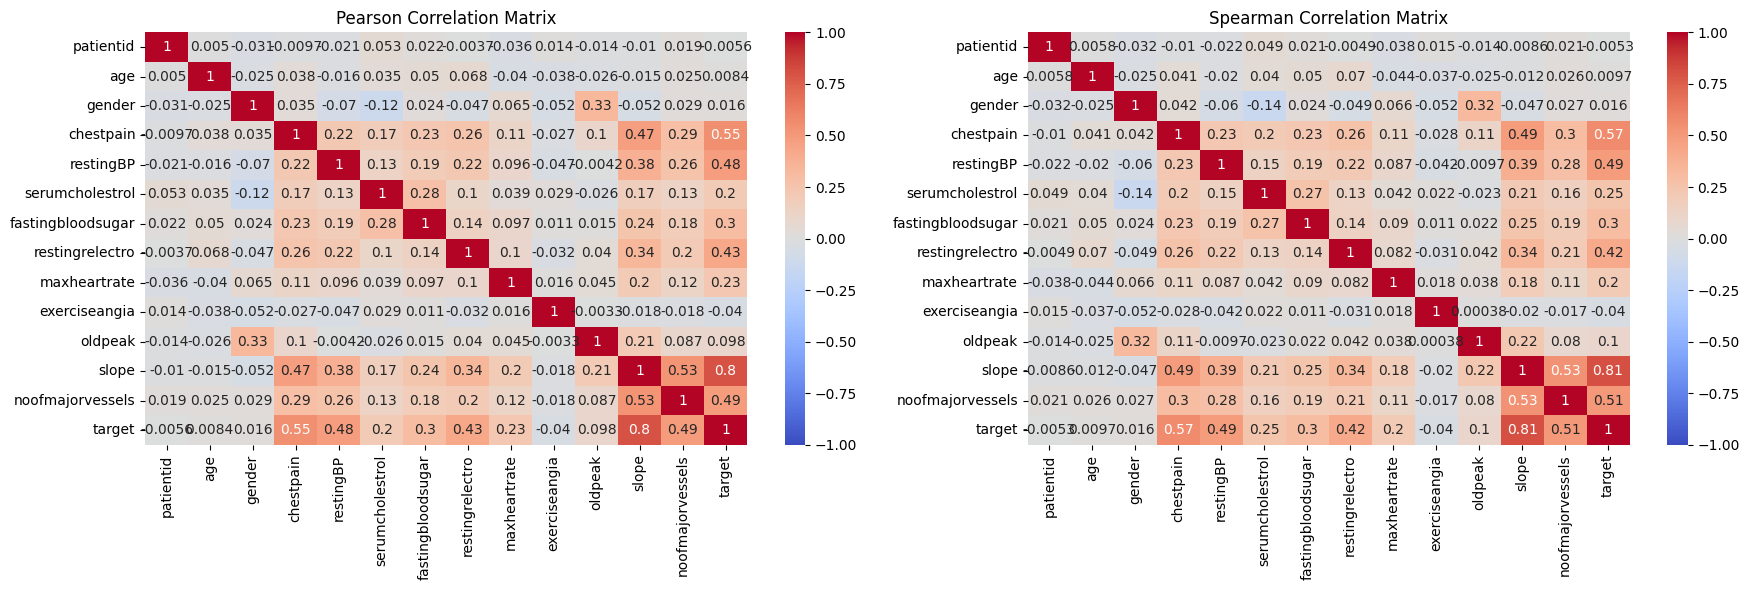

In [14]:
# Correlation matrices
pearson_corr = df.corr(method='pearson')
# Set up the plotting area
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Pearson correlation matric - linear relationships
# the strength and direction of a linear relationship between two continuous variables
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax1)
ax1.set_title("Pearson Correlation Matrix")

# Spearman’s correlation matrix - monotonic relationships
# Whether the relationship between the two variables is monotonic
# meaning that as the value of one variable increases, so does the value of the other variable.
spearman_corr = df.corr(method='spearman')

sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax2)
ax2.set_title("Spearman Correlation Matrix")
plt.tight_layout()
plt.show()

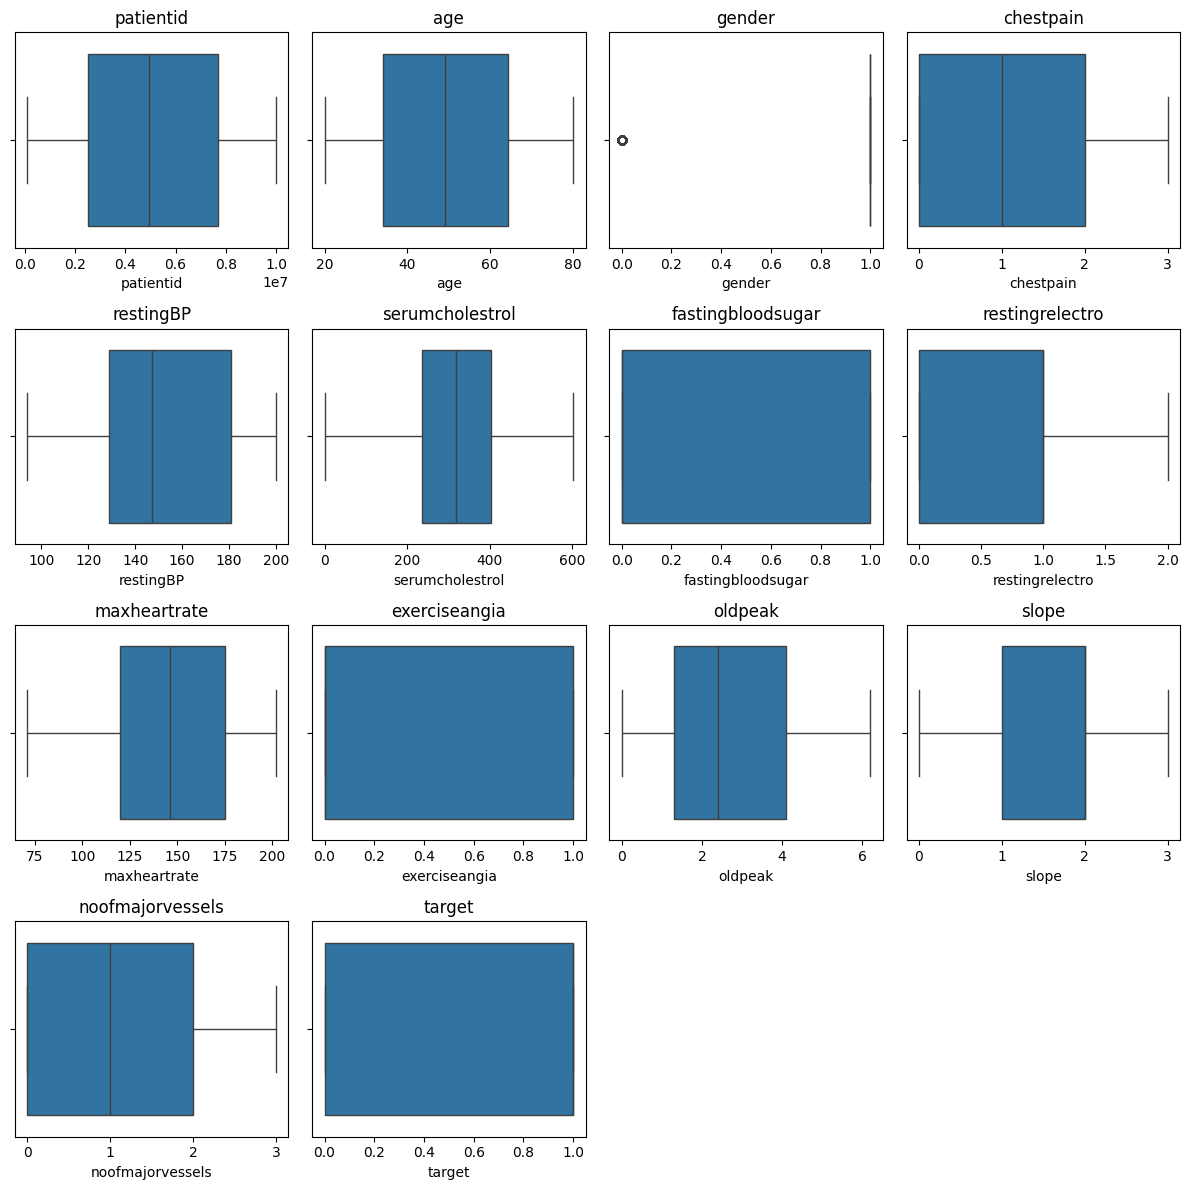

In [15]:

fig, axes = plt.subplots(rows, cols, figsize=(12,12))

# flattens the axes array to easily iterate over it
axes = axes.flatten()

num_features = len(df.columns) 

for i, ax in enumerate(axes):
    if i < num_features:  # check if there are still columns to plot
        sns.boxplot(x=df.columns[i], data=df, ax=ax)
        ax.set_title(df.columns[i])
    else:
        ax.axis('off')  # turn off unused subplots
plt.tight_layout()
plt.show()

In [16]:
X = df.drop(columns='target', axis=1)
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

******** Extra Trees Regressor *********
Mean Absolute Error 0.04
Score 0.9435320770260529
RMSE 0.11708543888972703


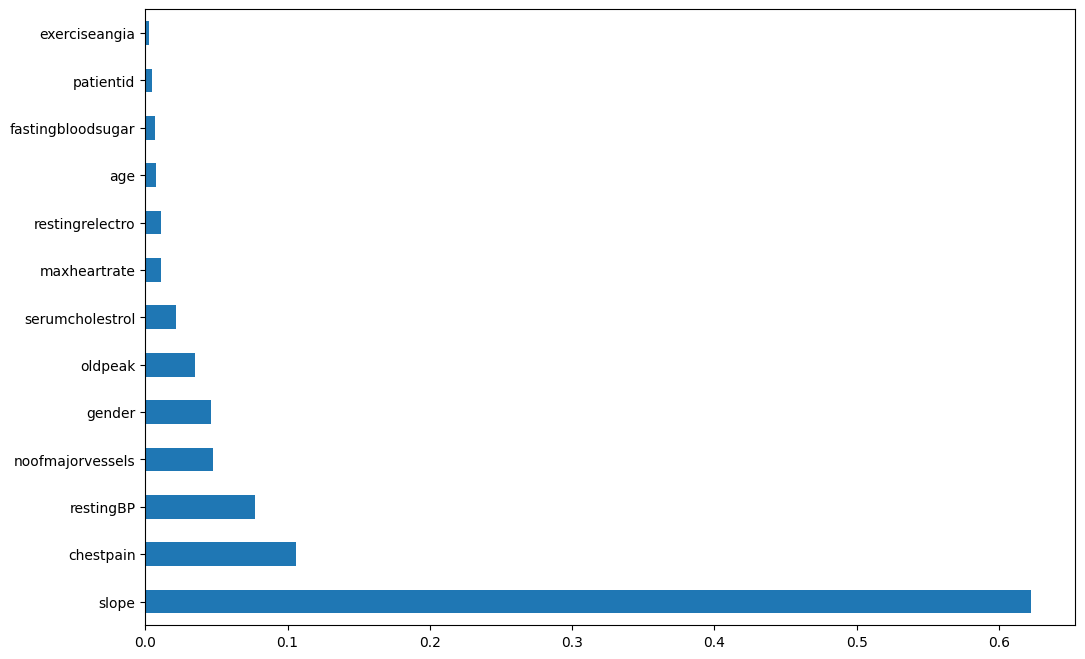

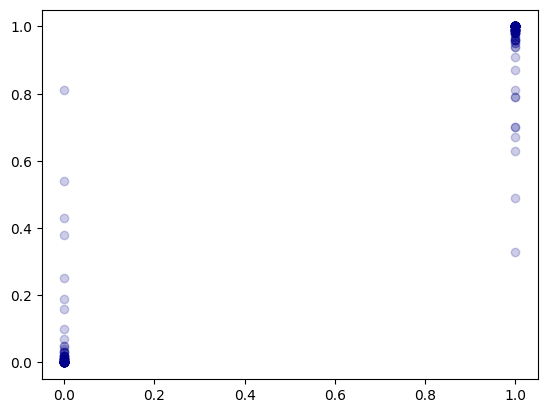

,Predicted,Reality
521,1.00,1
737,0.00,0
740,0.10,0
660,0.03,0
411,0.98,1
...,...,...
408,1.00,1
332,0.00,0
208,0.81,0
613,1.00,1


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("******** Extra Trees Regressor *********")
extra_trees_model = ExtraTreesRegressor()
extra_trees_model.fit(X_train, Y_train)
price_pred = extra_trees_model.predict(X_test)
print('Mean Absolute Error', round(metrics.mean_absolute_error(Y_test, price_pred), 2))

print('Score', extra_trees_model.score(X_test, Y_test))
import sklearn.metrics as metrics
print("RMSE", np.sqrt(metrics.mean_squared_error(Y_test, price_pred)))


plt.figure(figsize = (12,8))
feat_importances = pd.Series(extra_trees_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

plt.scatter(Y_test,price_pred,alpha =0.2,color="DarkBlue")


plt.show()

results = {}
results['Predicted'] = price_pred.round(2) 
results['Reality'] = Y_test.round(2)

pd.DataFrame.from_dict(results)

[LightGBM] [Info] Number of positive: 463, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.578750 -> initscore=0.317644
[LightGBM] [Info] Start training from score 0.317644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

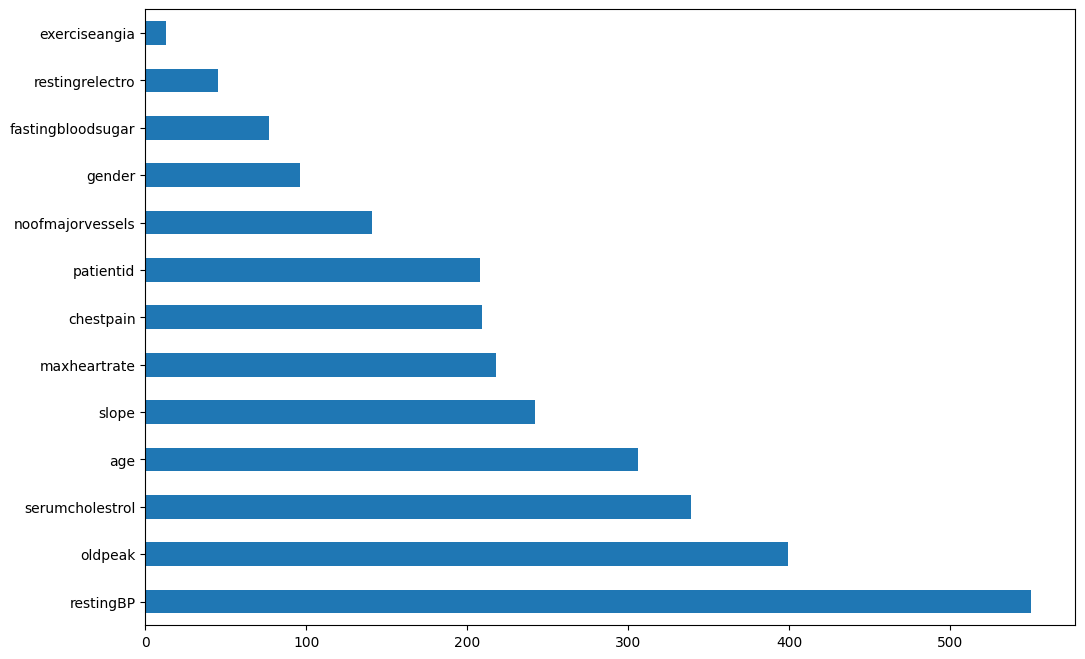

Accuracy: 0.985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.98      0.99      0.99       117

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [24]:
import lightgbm as lgb
clf = lgb.LGBMClassifier() # default params first
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(Y_test, prediction))
